# Cross-Validation with Scikit-learn: Analyzing Earnings Transcripts

This notebook demonstrates various cross-validation techniques using scikit-learn, specifically applied to analyzing company earnings transcripts.

## Setup and Imports

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
#np.random.seed(42)


## 1. Data Preparation

First, let's create a sample dataset of earnings transcripts with sentiment labels. In a real-world scenario, you would load your own dataset here.

In [35]:
# Create sample dataset
transcripts = [
    "Strong revenue growth and expanding margins this quarter",
    "Missed expectations due to supply chain challenges",
    "Record profits and expanding market share",
    "Restructuring costs impacted bottom line",
    "New product launch exceeded expectations",
    "Declining market share and increased competition",
    "Robust growth across all business segments",
    "Write-downs and impairment charges affected profitability"
]

# 1 for positive sentiment, 0 for negative
labels = np.array([1, 0, 1, 0, 1, 0, 1, 0])

print(f"Dataset size: {len(transcripts)} samples")
print(f"Class distribution:\n{pd.Series(labels).value_counts()}")

Dataset size: 8 samples
Class distribution:
1    4
0    4
Name: count, dtype: int64


-----------

## 2. Text Vectorization

Convert our text data into numerical features using TF-IDF vectorization.

In [36]:
# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(transcripts)

print(f"Feature matrix shape: {X.shape}")
print("\nSample feature names:")
print(list(vectorizer.vocabulary_.keys())[:5])

Feature matrix shape: (8, 35)

Sample feature names:
['strong', 'revenue', 'growth', 'expanding', 'margins']


--------

## 3. Basic Train-Test Split

Before diving into cross-validation, let's see how a basic train-test split works.

In [37]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.25, random_state=42
)

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/Users/brendan/Desktop - Brendan’s MacBook Air/nvda-certification/torch-ml-312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/brendan/Desktop - Brendan’s MacBook Air/nvda-certification/torch-ml-312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/brendan/Desktop - Brendan’s MacBook Air/nvda-certification/torch-ml-312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no p

-----------

## 4. K-Fold Cross-Validation

Now let's implement k-fold cross-validation to get a more robust estimate of model performance.

In [38]:
# Initialize K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, labels, cv=kf)

print(f"Cross-validation scores: {scores}")
print(f"Mean CV score: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Cross-validation scores: [0. 1. 0. 0. 0.]
Mean CV score: 0.20 (+/- 0.80)


### Visualize Cross-Validation Results

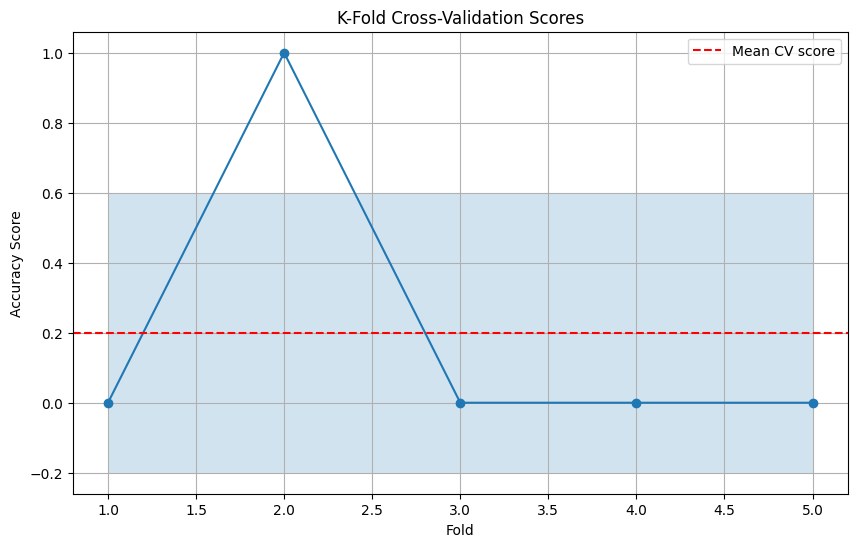

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, 'o-')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean CV score')
plt.fill_between(range(1, len(scores) + 1), 
                 scores.mean() - scores.std(),
                 scores.mean() + scores.std(), 
                 alpha=0.2)
plt.title('K-Fold Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.legend()
plt.show()

## 5. Practical Application: Predicting New Transcripts

Let's create a function to predict the sentiment of new earnings transcripts.

In [40]:
def predict_sentiment(transcript):
    # Vectorize new transcript
    X_new = vectorizer.transform([transcript])
    
    # Predict
    prediction = model.predict(X_new)
    probability = model.predict_proba(X_new)
    
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    confidence = max(probability[0])
    
    return sentiment, confidence

# Test the function
new_transcript = "Negative performance across all segments with decreased guidance"
sentiment, confidence = predict_sentiment(new_transcript)

print(f"Transcript: {new_transcript}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence: {confidence:.2f}")

Transcript: Negative performance across all segments with decreased guidance
Predicted Sentiment: Positive
Confidence: 0.70


## Best Practices and Tips

1. **Feature Engineering**:
   - Add domain-specific features (e.g., financial metrics)
   - Consider n-grams for better context capture
   - Normalize or standardize numerical features

2. **Cross-Validation Strategies**:
   - Use StratifiedKFold for imbalanced datasets
   - Consider TimeSeriesSplit for temporal data
   - Adjust number of folds based on dataset size

3. **Model Selection**:
   - Try different algorithms (SVM, Random Forest, etc.)
   - Use GridSearchCV for hyperparameter tuning
   - Consider ensemble methods

4. **Evaluation**:
   - Look beyond accuracy (precision, recall, F1)
   - Analyze confusion matrix
   - Consider business impact of different error types